In [1]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
list_files = glob.glob('/mnt/Data/Data/IMERG/raw_half_hour/*.nc')
list_files = sorted(list_files)
len_files = len(list_files)
print(f'Length of list_files: {len_files}')

Length of list_files: 384


In [3]:
# Add all half hoirs times in one matrix
half_hour_matrix = None

for t in range(len_files):

    data = ca.read_netcdf(list_files[t],0)
    pre_tmp = data['precipitationCal'][0,:,:].data.T
    pre_tmp[pre_tmp == np.min(pre_tmp)] = 0

    if half_hour_matrix is None:
        data = ca.read_netcdf(list_files[t],0)
        lat = data['lat']
        lon = data['lon']

        nlat = len(lat)
        nlon = len(lon)

        lon2d, lat2d = np.meshgrid(lon, lat)

        half_hour_matrix = np.zeros([len_files,nlat,nlon])

    half_hour_matrix[t,:,:] = pre_tmp


In [4]:
# Accumulated from half hour to hour
hourly_times = int(len_files / 2)
print(f'Number of hours: {hourly_times}')

salida_hourly = np.zeros([hourly_times,nlat,nlon])

for t in range(hourly_times):

    salida_hourly[t,:,:] = half_hour_matrix[2*t,:,:] + half_hour_matrix[2*t+1,:,:]

hourly_mean = np.mean(salida_hourly,axis=0)

Number of hours: 192


Text(0.5, 1.0, 'Acummulated half hour time 0 and 1')

/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


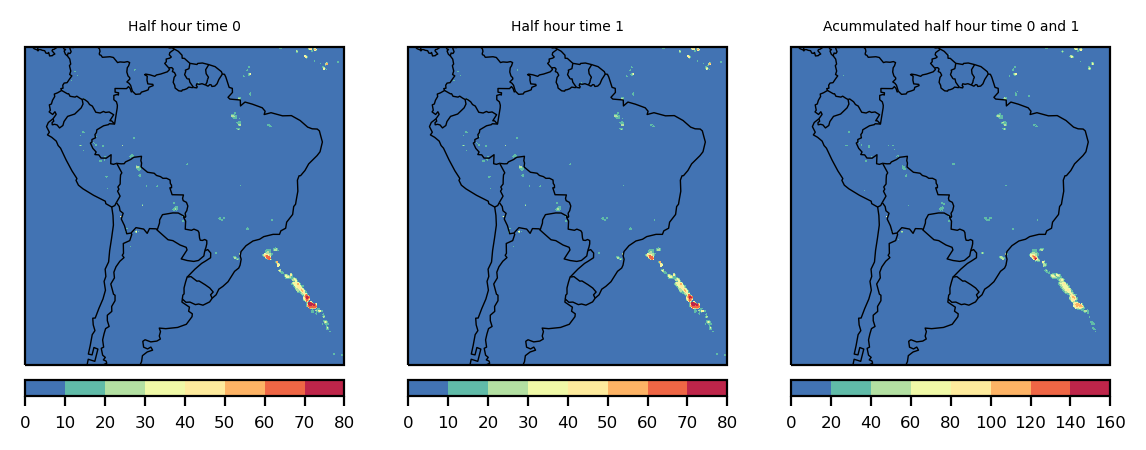

In [5]:
levels = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7,9.5),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-85,-31,-42,8])
a1 = ax1.contourf(lon2d,lat2d,half_hour_matrix[0,:,:],cmap=cmap,levels=levels)
cbar = plt.colorbar(a1,orientation='horizontal',pad=0.01)
cbar.ax.tick_params(labelsize=6)
ax1.set_title('Half hour time 0',fontsize=5)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-85,-31,-42,8])
a1 = ax1.contourf(lon2d,lat2d,half_hour_matrix[0,:,:],cmap=cmap,levels=levels)
cbar = plt.colorbar(a1,orientation='horizontal',pad=0.01)
cbar.ax.tick_params(labelsize=6)
ax1.set_title('Half hour time 1',fontsize=5)

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-85,-31,-42,8])
a1 = ax1.contourf(lon2d,lat2d,salida_hourly[0,:,:],cmap=cmap,levels=levels)
cbar = plt.colorbar(a1,orientation='horizontal',pad=0.01)
cbar.ax.tick_params(labelsize=6)
ax1.set_title('Acummulated half hour time 0 and 1',fontsize=5)

### Export hourly data to netcdf

In [6]:
file_name_out = "/mnt/Data/Data/IMERG/IMERG_2021_01_01_2021_01_08_hourly_01x01.nc"

info = {'file': file_name_out,
        'title': 'IMERG precipitation data IR + microwave + gauge 0.1x0.1',
        'year_start':2021,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0,
        'year_end':2021,'month_end':1,'day_end':8,'hour_end':23,'minute_end':55,
        'time_frequency': 'hourly',
        'time_interval': 1,
        'var_name': 'pre',
        'var_units': 'mm/hr'}

print()
ca.create_netcdf(info,salida_hourly,lat,lon)


Time Start: 2021-01-01 00:00:00
Time End: 2021-01-08 23:00:00
Time Frequency: hourly
Time Lenght: 192

File created in:  /mnt/Data/Data/IMERG/IMERG_2021_01_01_2021_01_08_hourly_01x01.nc
File title:  IMERG precipitation data IR + microwave + gauge 0.1x0.1
var title:  pre
var units:  mm/hr
